In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# 1. load and ensure positivity
df = pd.read_csv("housing.csv")
x = df["total_rooms"]
# Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
# A positive skew indicates a longer or fatter tail on the right side, while a negative skew indicates a longer or fatter tail on the left.
print(x.skew())

4.147343450632158


In [15]:
x_shifted = x + 1e-6          # add tiny epsilon if zeros could exist
print(x_shifted.head())
print(x.head())
# 2. fit Box-Cox and transform
x_bc, lam = boxcox(x_shifted)   # returns transformed data + λ
print(f"Estimated λ = {lam:.3f}")
print(x_bc[:5])


0     880.000001
1    7099.000001
2    1467.000001
3    1274.000001
4    1627.000001
Name: total_rooms, dtype: float64
0     880.0
1    7099.0
2    1467.0
3    1274.0
4    1627.0
Name: total_rooms, dtype: float64
Estimated λ = 0.221
[15.70672987 27.556488   18.12379817 17.42917977 18.64749925]


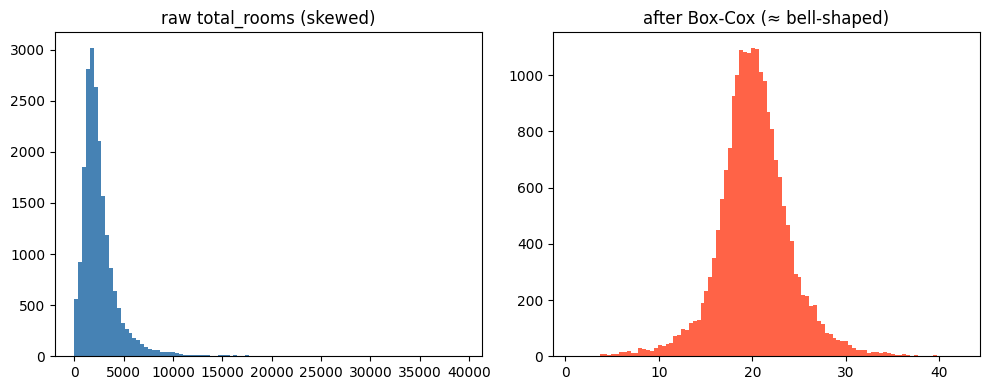

In [10]:
# 3. plot before/after
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(x, bins=100, color="steelblue")
ax[0].set_title("raw total_rooms (skewed)")
ax[1].hist(x_bc, bins=100, color="tomato")
ax[1].set_title("after Box-Cox (≈ bell-shaped)")
plt.tight_layout(); plt.show()

In [7]:
# 4. inverse-transform a value if needed
x_back = (lam * x_bc[0] + 1) ** (1/lam)
print("round-trip ok:", np.isclose(x.iloc[0], x_back))

round-trip ok: True
